COUGH DETECTION USING EC50 DATASET

In [ ]:
# Dataset(Features Extracted) -> "https://drive.google.com/file/d/1iUAiIWX7HTbFmV8oThD7_nsBXCL0pGIH/view?usp=sharing"

In [ ]:
# Best Model(Extra Trees Classifier) -> "https://drive.google.com/file/d/1RUrCVgyhnIQ75OsQP6sT9RDdY4kj0rNW/view?usp=sharing"

In [85]:
ec50filepath = "/content/drive/MyDrive/ec50/ec50_data.parquet"

In [86]:
import pandas as pd
import os
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import pandas as pd
df = pd.read_parquet(ec50filepath)
df.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mels5,mels6,mels7,mels8,mels9,mels10,zcr,sc,sr,status
0,-220.101135,131.230728,28.395472,78.291901,14.544521,23.645449,18.423018,9.153439,-3.601850,6.003956,...,0.006738,0.008181,0.013148,0.005518,0.001258,0.000289,0.016816,753.409721,1367.956543,wind
1,-317.502777,146.177353,-17.692684,18.609312,-0.379267,13.967452,12.510880,-3.633912,-5.190124,3.865999,...,0.107843,0.015359,0.016034,0.004690,0.000764,0.000030,0.061679,1352.787275,2641.555786,breathing
2,-538.128662,15.930167,-10.820147,2.244197,-0.067081,-3.166114,0.969984,-0.095285,-4.449955,2.391409,...,0.199695,0.260446,0.265386,0.041402,0.001932,0.000939,0.029695,463.249212,763.930257,coughing
3,-823.460388,14.357989,-0.342857,3.046535,-1.855741,-3.136663,-0.314061,1.951042,-0.616935,2.040307,...,0.000168,0.000791,0.000534,0.000049,0.000013,0.000004,0.011072,245.492107,512.360636,coughing
4,-432.105408,65.021370,19.163795,37.822872,22.149366,19.557327,13.462640,17.397635,11.829626,13.782324,...,0.002882,0.002591,0.001846,0.001211,0.000355,0.000212,0.030859,1349.682907,2966.398112,snoring


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mfcc1   200 non-null    float32
 1   mfcc2   200 non-null    float32
 2   mfcc3   200 non-null    float32
 3   mfcc4   200 non-null    float32
 4   mfcc5   200 non-null    float32
 5   mfcc6   200 non-null    float32
 6   mfcc7   200 non-null    float32
 7   mfcc8   200 non-null    float32
 8   mfcc9   200 non-null    float32
 9   mfcc10  200 non-null    float32
 10  mfcc11  200 non-null    float32
 11  mfcc12  200 non-null    float32
 12  mfcc13  200 non-null    float32
 13  mfcc14  200 non-null    float32
 14  mfcc15  200 non-null    float32
 15  mfcc16  200 non-null    float32
 16  mels1   200 non-null    float32
 17  mels2   200 non-null    float32
 18  mels3   200 non-null    float32
 19  mels4   200 non-null    float32
 20  mels5   200 non-null    float32
 21  mels6   200 non-null    float32
 22  me

In [89]:
df["status"].value_counts()

wind         40
breathing    40
coughing     40
snoring      40
sneezing     40
Name: status, dtype: int64

In [90]:
status_label_map = {"breathing":0, "coughing":1, "sneezing":2, "snoring":3, "wind":4}
df = df.replace({"status": status_label_map})

<Axes: >

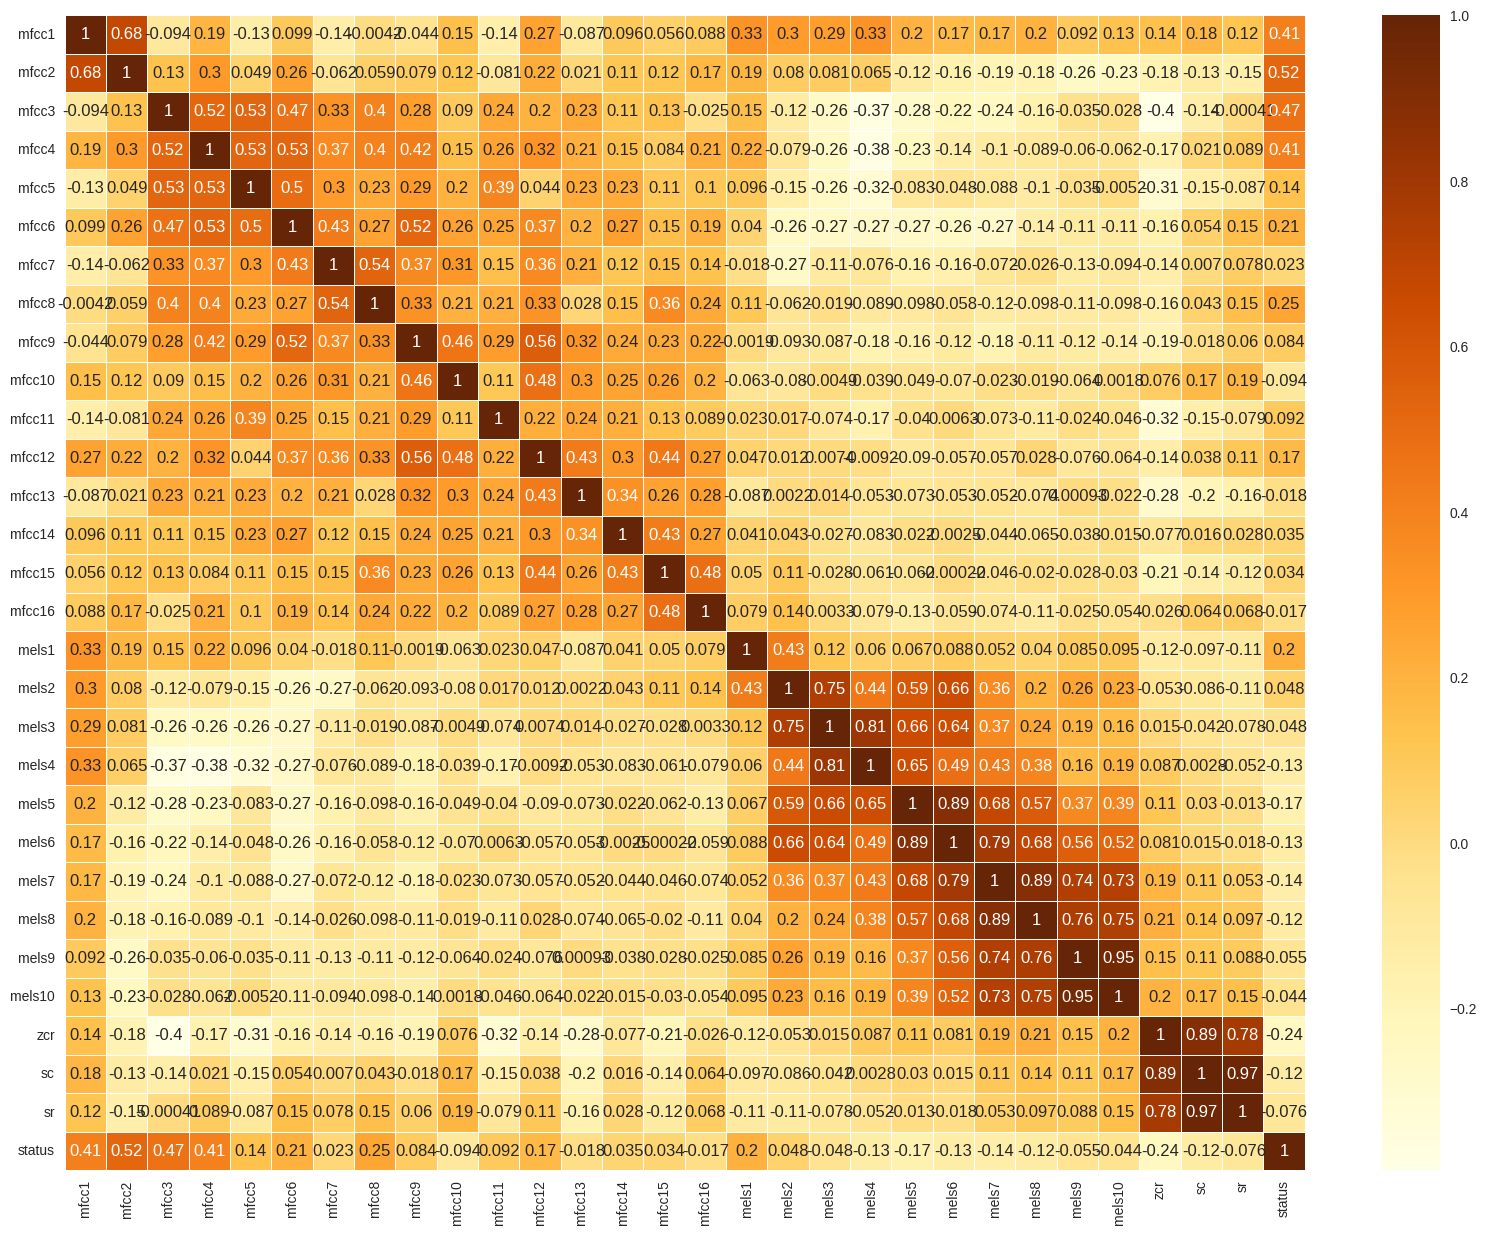

In [91]:
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(data = df.corr(), cmap="YlOrBr", annot = True, linewidth = 0.5)

In [56]:
!pip install --pre pycaret

In [92]:
X = df.drop(["status"], axis=1)
y = df["status"]

In [30]:
#X = X.drop(['mels1','mels2','mels3','mels4','mels5','mels6','mels7','mels8','mels9','mels10'], axis=1)
#X.head(2)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,zcr,sc,sr
0,-220.101135,131.230728,28.395472,78.291901,14.544521,23.645449,18.423018,9.153439,-3.601850,6.003956,2.069572,2.637396,-0.558741,2.357210,-3.273245,-2.934008,0.016816,753.409721,1367.956543
1,-317.502777,146.177353,-17.692684,18.609312,-0.379267,13.967452,12.510880,-3.633912,-5.190124,3.865999,7.834537,-6.130738,-4.712753,-8.053221,-6.107264,-0.502258,0.061679,1352.787275,2641.555786


In [93]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=df['status'])

In [94]:
df_train = X_train.assign(status = y_train)
df_train.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mels5,mels6,mels7,mels8,mels9,mels10,zcr,sc,sr,status
41,-253.868149,137.491882,9.746338,42.696659,-11.660036,-0.054088,-8.946874,-1.400314,-17.106367,-10.890932,...,0.004463,0.004543,0.003852,0.001358,0.000603,0.000110,0.042530,1285.339312,2859.031169,4
150,-427.257874,31.822180,-4.591577,3.536274,1.627721,0.478345,-3.318478,-6.471299,-3.973131,-1.041031,...,0.724383,0.225121,0.072914,0.024171,0.007667,0.004958,0.048525,1148.841050,2409.974162,2
183,-392.148865,51.637985,-8.607751,26.819458,-2.345152,-2.115212,-10.013031,-6.722151,-4.480645,-4.009707,...,0.566874,0.796624,1.093905,0.787189,0.146655,0.026348,0.171653,2986.773757,6004.174805,2
14,-639.497742,14.532851,-2.439203,3.347258,-0.571046,1.479760,-2.209610,1.664152,1.312334,-1.197623,...,0.047990,0.131128,0.037520,0.013653,0.009556,0.001373,0.030696,546.007716,1148.786418,2
149,-563.604309,11.114387,3.184402,4.061939,4.510291,3.967614,2.242695,3.378461,2.043967,2.391472,...,0.703164,0.341093,0.265579,0.058694,0.117155,0.048007,0.024532,799.302533,1916.106160,2


In [95]:
df_train.status.value_counts()

4    28
2    28
3    28
0    28
1    28
Name: status, dtype: int64

In [96]:
df_test = X_test.assign(status = y_test)
df_test.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mels5,mels6,mels7,mels8,mels9,mels10,zcr,sc,sr,status
58,-523.017029,20.664352,1.047255,5.426993,4.627304,2.945143,-2.132275,-0.740738,-2.401495,-1.175035,...,0.604627,0.612558,0.161450,0.048846,0.054625,0.036019,0.048778,938.526776,1988.581340,2
133,-254.400330,136.614243,18.725159,36.551521,9.845412,17.555147,7.797930,12.117919,8.826768,12.669594,...,0.007432,0.003996,0.002040,0.001160,0.000456,0.000168,0.011911,799.799473,1463.809204,4
188,-351.348694,86.569237,36.344097,36.678978,8.527286,7.918758,10.658216,6.087121,1.004710,5.246319,...,0.002344,0.005722,0.007961,0.002190,0.001305,0.000551,0.080933,2302.698322,5472.224935,3
59,-449.782776,27.381235,7.674214,13.872054,13.090359,11.812511,0.490257,2.936348,-1.040118,-1.479110,...,0.510014,0.372725,0.146588,0.090626,0.106902,0.033539,0.088282,2287.065339,5286.550903,2
2,-538.128662,15.930167,-10.820147,2.244197,-0.067081,-3.166114,0.969984,-0.095285,-4.449955,2.391409,...,0.199695,0.260446,0.265386,0.041402,0.001932,0.000939,0.029695,463.249212,763.930257,1


In [97]:
df_test.status.value_counts()

2    12
4    12
3    12
1    12
0    12
Name: status, dtype: int64

In [98]:
from pycaret.classification import *

s = setup(df_train, target = 'status')

,Description,Value
0,Session id,4607
1,Target,status
2,Target type,Multiclass
3,Original data shape,"(140, 30)"
4,Transformed data shape,"(140, 30)"
5,Transformed train set shape,"(98, 30)"
6,Transformed test set shape,"(42, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [99]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8367,0.9698,0.8367,0.8633,0.8243,0.7946,0.8075,0.6750
et,Extra Trees Classifier,0.8267,0.9600,0.8267,0.8670,0.8176,0.7824,0.7964,0.4680
gbc,Gradient Boosting Classifier,0.7944,0.9383,0.7944,0.8241,0.7776,0.7422,0.7593,1.6850
xgboost,Extreme Gradient Boosting,0.7822,0.9375,0.7822,0.8056,0.7713,0.7266,0.7369,0.2480
ridge,Ridge Classifier,0.7633,0.0000,0.7633,0.7761,0.7421,0.7031,0.7229,0.0760
lr,Logistic Regression,0.7622,0.9507,0.7622,0.7900,0.7440,0.7007,0.7250,0.6500
lightgbm,Light Gradient Boosting Machine,0.7333,0.9410,0.7333,0.7378,0.7099,0.6650,0.6808,0.5090
lda,Linear Discriminant Analysis,0.7222,0.9080,0.7222,0.7767,0.7120,0.6516,0.6694,0.1310
dt,Decision Tree Classifier,0.6800,0.7991,0.6800,0.6546,0.6501,0.5984,0.6110,0.1620
nb,Naive Bayes,0.5600,0.8789,0.5600,0.5382,0.5209,0.4473,0.4662,0.1570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [100]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4607, verbose=0, warm_start=False)


In [101]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
                                             'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8',
                                             'mfcc9', 'mfcc10', 'mfcc11',
                                             'mfcc12', 'mfcc13', 'mfcc14',
                                             'mfcc15', 'mfcc16', 'mels1',
                                             'mels2', 'mels3', 'mels4', 'mels5',
                                             'mels6', 'mels7', 'mels8', 'mels9',
                                             'mels10', 'zcr', 'sc', 'sr']...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=4607,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [102]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [103]:
predict_model(best, df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7333,0.9347,0.7333,0.7305,0.7295,0.6667,0.6678


,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mels7,mels8,mels9,mels10,zcr,sc,sr,status,prediction_label,prediction_score
58,-523.017029,20.664352,1.047255,5.426993,4.627304,2.945143,-2.132275,-0.740738,-2.401495,-1.175035,...,0.161450,0.048846,0.054625,0.036019,0.048778,938.526794,1988.581299,2,2,0.83
133,-254.400330,136.614243,18.725159,36.551521,9.845412,17.555147,7.797930,12.117919,8.826768,12.669594,...,0.002040,0.001160,0.000456,0.000168,0.011911,799.799500,1463.809204,4,3,0.43
188,-351.348694,86.569237,36.344097,36.678978,8.527286,7.918758,10.658216,6.087121,1.004710,5.246319,...,0.007961,0.002190,0.001305,0.000551,0.080933,2302.698242,5472.225098,3,3,0.65
59,-449.782776,27.381235,7.674214,13.872054,13.090359,11.812511,0.490257,2.936348,-1.040118,-1.479110,...,0.146588,0.090626,0.106902,0.033539,0.088282,2287.065430,5286.550781,2,2,0.82
2,-538.128662,15.930167,-10.820147,2.244197,-0.067081,-3.166114,0.969984,-0.095285,-4.449955,2.391409,...,0.265386,0.041402,0.001932,0.000939,0.029695,463.249207,763.930237,1,1,0.56
148,-471.498108,23.117775,0.531617,5.111491,2.859549,3.456868,0.986115,2.010341,1.740881,1.860065,...,0.041175,0.013516,0.016431,0.007262,0.120746,2580.037354,5629.686523,2,2,0.56
76,-460.510040,24.651436,-2.938612,5.142471,-3.766313,-0.239527,-8.354722,-7.604561,-4.975254,-4.804114,...,0.014395,0.011093,0.005015,0.002404,0.181116,2892.588867,5745.726562,2,1,0.42
22,-665.482910,21.296471,-3.857877,2.116436,-12.085871,-7.703020,-2.155967,1.817505,-0.802275,-2.640077,...,0.010497,0.009704,0.004670,0.002107,0.113277,1756.420044,3504.279541,2,0,0.41
90,-203.617111,81.660995,25.465292,31.411816,20.698780,17.907173,5.903119,10.128933,2.264561,8.128223,...,0.011257,0.007112,0.006893,0.003856,0.049303,2076.003662,5230.923340,3,3,0.45
109,-514.032532,94.477005,-21.903984,-0.876877,9.578150,32.522583,4.253314,3.665224,5.043077,3.720770,...,0.000313,0.000339,0.000252,0.000025,0.090040,2160.697266,4859.276367,0,0,0.76


In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
# Define the model
et_clf = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=8058, verbose=0, warm_start=False)
# Create a cross-validation object (in this example, using 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(et_clf, X_train, y_train, cv=kf, scoring='f1_weighted')
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Print the average cross-validation score
print("Average F1 score:", np.mean(scores))

Cross-validation scores: [0.8977591  0.81649898 0.77085415 0.79485544 0.77835022]
Average F1 score: 0.8116635780186201


In [105]:
from sklearn.metrics import f1_score
et_clf = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=8058, verbose=0, warm_start=False)
et_clf.fit(X_train, y_train)
y_test_pred = et_clf.predict(X_test)
f1_score(y_test, y_test_pred, average="weighted")

0.7641491841491841

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# Define the model
reg = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4607, verbose=0, warm_start=False)
# Create a cross-validation object (in this example, using 5-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(reg, X_train, y_train, cv=kf, scoring='f1_weighted')
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Print the average cross-validation score
print("Weighted F1 score:", np.mean(scores))

Cross-validation scores: [0.77653061 0.77619048 0.69047619 0.63520408 0.86190476 0.76666667
 0.67142857 0.86103896 0.71428571 0.69771181]
Weighted F1 score: 0.7451437847866419


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4607, verbose=0, warm_start=False)
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
f1_score(y_test, y_test_pred, average="weighted")

0.7469979296066251

In [108]:
import joblib
filename = 'cough_detection_model.pkl'
joblib.dump(et_clf, filename)

['cough_detection_model.pkl']

In [109]:
# load
clf2 = joblib.load('cough_detection_model.pkl')
y_test_pred = clf2.predict(X_test)
f1_score(y_test, y_test_pred, average="weighted")

0.7641491841491841

In [110]:
import joblib
filename = 'cough_detection_model2.pkl'
joblib.dump(reg, filename)

['cough_detection_model2.pkl']

In [111]:
# load
clf2 = joblib.load('cough_detection_model2.pkl')
y_test_pred = clf2.predict(X_test)
f1_score(y_test, y_test_pred, average="weighted")

0.7469979296066251

In [ ]:
#Model Inference

In [1]:
import joblib
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reverse_status_map = {0:"breathing", 1:"coughing", 2:"sneezing", 3:"snoring", 4:"wind"}

In [3]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=16)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=10)
    mel_scaled_features = np.mean(mel_spectrogram.T,axis=0)

    zcr = librosa.feature.zero_crossing_rate(audio)
    zcr_scaled_features = np.mean(zcr.T,axis=0)

    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
    spectral_centroid_scaled_features = np.mean(spectral_centroid.T,axis=0)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
    spectral_rolloff_scaled_features = np.mean(spectral_rolloff.T,axis=0)
    
    #stft = np.abs(librosa.stft(audio))
    #chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    #chroma_scaled_features = np.mean(chroma.T,axis=0)


    return mfccs_scaled_features,mel_scaled_features,zcr_scaled_features,spectral_centroid_scaled_features,spectral_rolloff_scaled_features  #, chroma_scaled_features

In [4]:
def model_5_inference(model_path,audio_file):
    
    #load model
    clf2 = joblib.load(model_path)

    #preprocess audio file
    extracted_features = []
    mfcc,mels,zcr,sc,sr = features_extractor(audio_file)
    extracted_features.append([mfcc[0],mfcc[1],mfcc[2],mfcc[3],mfcc[4],mfcc[5],\
                               mfcc[6],mfcc[7],mfcc[8],mfcc[9],mfcc[10],mfcc[11],\
                                mfcc[12],mfcc[13],mfcc[14],mfcc[15],\
                                    mels[0],mels[1],mels[2],mels[3],mels[4],mels[5],\
                                        mels[6],mels[7],mels[8],mels[9],\
                                            zcr[0],sc[0],sr[0]])
    
    audio_features = pd.DataFrame(extracted_features,columns=['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5',\
                                                                 'mfcc6','mfcc7','mfcc8','mfcc9','mfcc10',\
                                                                    'mfcc11','mfcc12','mfcc13','mfcc14',\
                                                                        'mfcc15','mfcc16',\
                                                                            'mels1','mels2','mels3',\
                                                                                'mels4','mels5','mels6',\
                                                                                    'mels7','mels8','mels9','mels10',\
                                                                                        'zcr','sc','sr'])
    #get prediction
    y_test_pred = clf2.predict(audio_features)[0]
   
    #status label reverse mapping
    prediction = reverse_status_map.get(y_test_pred)
    
    return prediction

In [5]:
audio_file1 = "model_5_test_data/cough1.wav"
audio_file2 = "model_5_test_data/cough2.wav"
audio_file3 = "model_5_test_data/sneezing1.wav"
audio_file4 = "model_5_test_data/snoring1.wav"
audio_file5 = "model_5_test_data/breathing.wav"
audio_file6 = "model_5_test_data/wind1.wav"

model_5_file = "cough_detection_model.pkl"

In [6]:
print(model_5_inference(model_5_file,audio_file1))
print(model_5_inference(model_5_file,audio_file2))
print(model_5_inference(model_5_file,audio_file3))
print(model_5_inference(model_5_file,audio_file4))
print(model_5_inference(model_5_file,audio_file5))
print(model_5_inference(model_5_file,audio_file6))

sneezing
coughing
sneezing
snoring
breathing
wind
